# John's EDA

##### Goals:
1. Produce Cases/Deaths scatterplot for a few states over time.
2. Produce animation of cases/deaths over time on bar plot
3. Produce cases/deaths on US Map for different dates
4. Produce population versus cases plots

#### To Run This

1. Run: /Covid19_Project/data_sourcing/covidtrackingproject_covid19_data
2. Run: /Covid19_Project/data_processing/covidtrackingproject_df_to_kaggle_covid_df_format
3. Run: /COVID19_Project/data_sourcing/usafacts_covid19_data.ipynb
3. Run this notebook

# 1. Cases/Deaths scatterplot for a few states over time.

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as FuncAnimation
import seaborn as sns
from datetime import datetime
#%matplotlib inline   #for static plots
#%matplotlib notebook  #for dynamic plots

In [2]:
#Importing cleaned COVID data
covid = pd.read_pickle('Data_pkl\\covidtrackingproject_kaggleformat_df.pkl') 
#covid.dtypes
covid.head(-5)

,date,state,fips,cases,deaths
0,2020-01-13,Washington,53,0,0
1,2020-01-14,Washington,53,0,0
2,2020-01-15,Washington,53,0,0
3,2020-01-16,Washington,53,0,0
4,2020-01-17,Washington,53,0,0
...,...,...,...,...,...
16753,2020-12-26,New York,36,914522,29396
16754,2020-12-26,Nevada,32,215653,2944
16755,2020-12-26,New Mexico,35,137226,2316
16756,2020-12-26,New Jersey,34,458901,18613


In [3]:
covid_by_state = covid.drop(['fips'], axis=1)
covid_by_state.head()

,date,state,cases,deaths
0,2020-01-13,Washington,0,0
1,2020-01-14,Washington,0,0
2,2020-01-15,Washington,0,0
3,2020-01-16,Washington,0,0
4,2020-01-17,Washington,0,0


In [4]:
covid_by_state[covid_by_state.state=='Washington']

,date,state,cases,deaths
0,2020-01-13,Washington,0,0
1,2020-01-14,Washington,0,0
2,2020-01-15,Washington,0,0
3,2020-01-16,Washington,0,0
4,2020-01-17,Washington,0,0
...,...,...,...,...
16515,2020-12-22,Washington,226635,3106
16570,2020-12-23,Washington,227887,3131
16627,2020-12-24,Washington,230202,3162
16683,2020-12-25,Washington,233093,3184


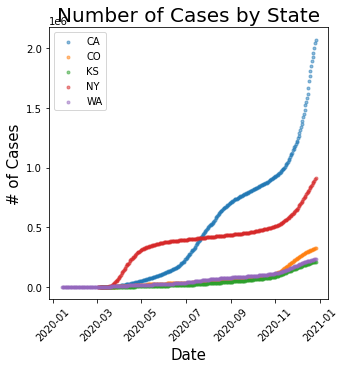

In [5]:
# Cases by State scatterplots
%matplotlib inline
fig, axs = plt.subplots(figsize=(5,5))

ca_date = covid_by_state[covid_by_state.state=='California'].date
co_date = covid_by_state[covid_by_state.state=='Colorado'].date
ks_date = covid_by_state[covid_by_state.state=='Kansas'].date
ny_date = covid_by_state[covid_by_state.state=='New York'].date
wa_date = covid_by_state[covid_by_state.state=='Washington'].date

ca_cases = covid_by_state[covid_by_state.state=='California'].cases
co_cases = covid_by_state[covid_by_state.state=='Colorado'].cases
ks_cases = covid_by_state[covid_by_state.state=='Kansas'].cases
ny_cases = covid_by_state[covid_by_state.state=='New York'].cases
wa_cases = covid_by_state[covid_by_state.state=='Washington'].cases

#scatter of each of the 5 states
axs.scatter(ca_date,ca_cases, alpha = 0.5, marker='.')
axs.scatter(co_date,co_cases, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_cases, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_cases, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_cases, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Cases by State", fontsize=20)
axs.set_ylabel('# of Cases', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

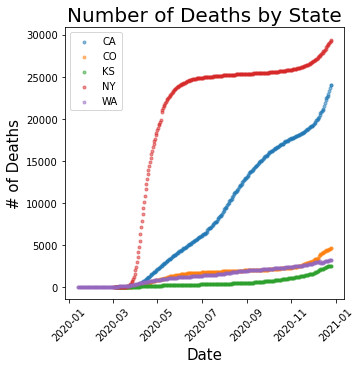

In [6]:
# Deaths by State scatterplots
%matplotlib inline

fig, axs = plt.subplots(figsize=(5,5))

ca_deaths = covid_by_state[covid_by_state.state=='California'].deaths
co_deaths = covid_by_state[covid_by_state.state=='Colorado'].deaths
ks_deaths = covid_by_state[covid_by_state.state=='Kansas'].deaths
ny_deaths = covid_by_state[covid_by_state.state=='New York'].deaths
wa_deaths = covid_by_state[covid_by_state.state=='Washington'].deaths

#scatter of each of the 5 states
axs.scatter(ca_date,ca_deaths, alpha = 0.5, marker='.')
axs.scatter(co_date,co_deaths, alpha = 0.5, marker='.')
axs.scatter(ks_date,ks_deaths, alpha = 0.5, marker='.')
axs.scatter(ny_date,ny_deaths, alpha = 0.5, marker='.')
axs.scatter(wa_date,wa_deaths, alpha = 0.5, marker='.')

#Labeling
axs.set_title("Number of Deaths by State", fontsize=20)
axs.set_ylabel('# of Deaths', fontsize=15)
axs.set_xlabel('Date', fontsize=15)
#axs.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.legend(['CA', 'CO', 'KS', 'NY', 'WA'])

# 2. Animation of cases/deaths over time on bar plot

In [7]:
#Re-use existing covid dataframe
covid.head()
#covid.date

,date,state,fips,cases,deaths
0,2020-01-13,Washington,53,0,0
1,2020-01-14,Washington,53,0,0
2,2020-01-15,Washington,53,0,0
3,2020-01-16,Washington,53,0,0
4,2020-01-17,Washington,53,0,0


In [8]:
#Remove quotes to run, takes a while to load.
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states 

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
cases={}
for state in states:
    cases_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['cases']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['cases'].iloc[i]
        cases_list.append(total)
    cases[state]=cases_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = cases[state]
cases_by_state = pd.DataFrame(data)

#Sorting dataframe by date
cases_by_state = cases_by_state.sort_values(by='date')
cases_by_state = cases_by_state.reset_index()
cases_by_state = cases_by_state.drop(['index'], axis=1)
cases_by_state.head()

#Convert dataframe to pickle, store for future use
cases_by_state.to_pickle('Data_pkl\cases_by_state.pkl')


In [9]:
#Remove quotes to run, takes a while to load.
#Repeat above for deaths reported instead of just cases
#Convert original COVID data to another dataframe format (easier to plot for animation)
#Sums all of the cases on all dates in all states (took John 7+ minutes to load)

#Create a dictionary of {key=states : value=list of cases over time}
states = list(covid.state.unique())
deaths={}
for state in states:
    deaths_list=[]
    for each in covid.date.unique():
        total = 0
        filtered = covid[(covid.date==each)&(covid['state']==state)]['deaths']
        for i in range(0,len(filtered)):
            total += covid[(covid.date==each)&(covid['state']==state)]['deaths'].iloc[i]
        deaths_list.append(total)
    deaths[state]=deaths_list

#Convert dictionary above to a dataframe
#Dataframe to have columns of states showing number of cases by date
states = list(covid.state.unique())
data = {'date':list(covid.date.unique())}
for state in states:
    data[state] = deaths[state]
deaths_by_state = pd.DataFrame(data)

#Sorting dataframe by date
deaths_by_state = deaths_by_state.sort_values(by='date')
deaths_by_state = deaths_by_state.reset_index()
deaths_by_state = deaths_by_state.drop(['index'], axis=1)
deaths_by_state.head()

#Convert dataframe to pickle, store for future use
deaths_by_state.to_pickle('Data_pkl\deaths_by_state.pkl')


In [10]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,Washington,Massachusetts,Florida,New Jersey,Nebraska,Virginia,Indiana,Michigan,Rhode Island,...,Mississippi,Utah,South Dakota,North Dakota,Oklahoma,Guam,American Samoa,Northern Mariana Islands,Virgin Islands,Puerto Rico
0,2020-01-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Get State population

#Raw population state data from USAFACTS source
for_population = pd.read_pickle("Data_pkl/covid19/usafacts_covid_df.pkl")   #read in raw pickled data (other notebook)
max_date = for_population["date"].max()                                     #keep only the latest date
print(max_date)
for_population = for_population[for_population['date'] == max_date]         #keep only the latest date
for_population = for_population.groupby("o_State")["o_State","population"].sum()   #sum all population by state
for_population['state_abb']=for_population.index                                   #add new column for merging tables 
# for_population.head()

#state abbreviations to state names conversion table
state_abbr = pd.read_csv("Data_Raw\\state_abb.csv")#, index_col=['date'])
# state_abbr.head()

#merge abbreviations table with population table
pop_by_state = for_population.merge(state_abbr, left_on = 'state_abb', right_on = 'state_abb', how='left')
pop_by_state.head()

2020-12-23 00:00:00


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,population,state_abb,state
0,731545,AK,Alaska
1,4903185,AL,Alabama
2,3017804,AR,Arkansas
3,7278717,AZ,Arizona
4,39512223,CA,California


In [12]:
#Divide cases & deaths by state population then multiply by 100,000 (to get cases/deaths per 100K)

#create list of states in population table and cases table for looping
pop_states = list(pop_by_state.state)
case_states = list(df1.columns)
# print(pop_states)
# print(case_states)

#initialize new dataframe tables for cases/death per 100K
df1_percap = df1    
df2_percap = df2

#For each state, divide cases/deaths by population then multiply by 100K
#drop columns that did not have state population data
for each in case_states:
    if each in pop_states:
        #print(df1[each]/int(pop_by_state.population[pop_by_state.state==each])*100000)
        df1_percap[each] = df1[each]/int(pop_by_state.population[pop_by_state.state==each])*100000
        df2_percap[each] = df2[each]/int(pop_by_state.population[pop_by_state.state==each])*100000
    elif each == 'date':
        df1_percap['date'] = df1['date']
        df2_percap['date'] = df2['date']
    else:
        df1_percap=df1_percap.drop(columns=[each])
        df2_percap=df2_percap.drop(columns=[each])

In [13]:
# #TESTING   
# print(df1.Kansas)   #shows cases in that state
# print(int(pop_by_state.population[pop_by_state.state=='Kansas']))   #shows population of that state 
# print(df1.Kansas/int(pop_by_state.population[pop_by_state.state=='Kansas'])*100000)   #runs previous calculation

In [14]:
#Prep cases/deaths dataframe for animation plot
df1_percap.index = df1_percap.date              #set date as index
df1_percap = df1_percap.drop(['date'], axis=1)  #drop extra date column that is not the index
df2_percap.index = df2_percap.date              #set date as index
df2_percap = df2_percap.drop(['date'], axis=1)  #drop extra date column that is not the index

#Transpose data to plot rows separately
df1t = df1_percap.T
df2t = df2_percap.T

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()

In [15]:
#This reindexing is so that all the US regions would be grouped together, to look better on the animation plot

df1ts=df1ts.reindex(['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho','Montana', 'Nevada', 'Oregon',   
'Utah', 'Washington', 'Wyoming' , 
'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 
'South Dakota', 'Wisconsin',
'Arizona','New Mexico', 'Oklahoma', 'Texas',
'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 
'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia',
'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
'Delaware', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'])

df2ts=df2ts.reindex(['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho','Montana', 'Nevada', 'Oregon',   
'Utah', 'Washington', 'Wyoming' , 
'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 
'South Dakota', 'Wisconsin',
'Arizona','New Mexico', 'Oklahoma', 'Texas',
'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 
'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia',
'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
'Delaware', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'])

In [16]:
#Checking how the dataframes have been prepped
df1ts.head()
#df2ts.head()

#print(df1ts.shape)
print(df2ts.shape)

(50, 349)


In [17]:
# #Test plot for ONE date - Cases

# #use inline for static plots as opposed to dynamic plots
# %matplotlib inline    
# frameno = df1ts.shape[1]-1          #row 50 will be called, selected randomly
# column=df1ts.iloc[:,frameno].name         #gets the name of the column which is the date
# df1tss=df1ts.sort_values(by=[column])     #sorts from least to most cases
# date=str(df1ts.iloc[:,frameno].name).split()[0:10][0]

# #Plotting
# fig, axs = plt.subplots(figsize=(10,5))
# axs.bar(df1tss.index, df1tss.iloc[:,frameno], color='royalblue')   #bar graph
# plt.xticks(rotation=90)
# axs.set_title("Cases on "+date, fontsize=20)
# axs.set_ylabel('# of Cases', fontsize=20)
# plt.show()


In [18]:
# #Test plot for ONE date - Deaths

# #use inline for static plots as opposed to dynamic plots
# %matplotlib inline    
# frameno = df2ts.shape[1]-1          #row 50 will be called, selected randomly
# column=df2ts.iloc[:,frameno].name         #gets the name of the column which is the date
# df2tss=df2ts.sort_values(by=[column])     #sorts from least to most cases
# date=str(df2ts.iloc[:,frameno].name).split()[0:10][0]

# #Plotting
# fig, axs = plt.subplots(figsize=(10,5))
# axs.bar(df2tss.index, df2tss.iloc[:,frameno], color='lightcoral')   #bar graph
# plt.xticks(rotation=90)
# axs.set_title("Deaths on "+date, fontsize=20)
# axs.set_ylabel('# of Deaths', fontsize=20)
# plt.show()

In [19]:
#Color coding scheme for US state regions, used for following plot and animation plots
colors={ 'Alabama':'lightcoral',
'Alaska':'lightskyblue',
'Arizona':'orange',
'Arkansas':'lightcoral',
'California':'lightskyblue',
'Colorado':'lightskyblue',
'Connecticut':'cornflowerblue',
'Delaware':'cornflowerblue',
'Florida':'lightcoral',
'Georgia':'lightcoral',
'Hawaii':'lightskyblue',
'Idaho':'lightskyblue',
'Illinois':'orange',
'Indiana':'orange',
'Iowa':'orange',
'Kansas':'orange',
'Kentucky':'lightcoral',
'Louisiana':'lightcoral',
'Maine':'cornflowerblue',
'Maryland':'cornflowerblue',
'Massachusetts':'cornflowerblue',
'Michigan':'orange',
'Minnesota':'orange',
'Mississippi':'lightcoral',
'Missouri':'lightcoral',
'Montana':'lightskyblue',
'Nebraska':'orange',
'Nevada':'lightskyblue',
'New Hampshire':'cornflowerblue',
'New Jersey':'cornflowerblue',
'New Mexico':'orange',
'New York':'cornflowerblue',
'North Carolina':'lightcoral',
'North Dakota':'orange',
'Ohio':'orange',
'Oklahoma':'orange',
'Oregon':'lightskyblue',
'Pennsylvania':'cornflowerblue',
'Rhode Island':'cornflowerblue',
'South Carolina':'lightcoral',
'South Dakota':'orange',
'Tennessee':'lightcoral',
'Texas':'orange',
'Utah':'lightskyblue',
'Vermont':'cornflowerblue',
'Virginia':'lightcoral',
'Washington':'lightskyblue',
'West Virginia':'lightcoral',
'Wisconsin':'orange',
'Wyoming':'lightskyblue'
}

colors_region = {'West':'lightskyblue',
    'Mid- & Southwest':'orange',             
    'South':'lightcoral',
    'New England & Mid-Atlantic':'cornflowerblue'}

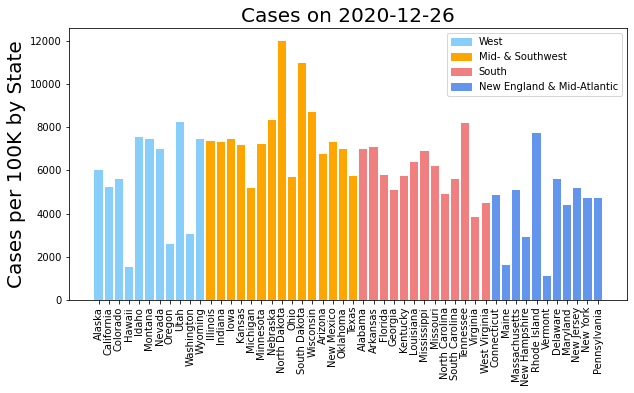

In [20]:
#Test plot for ONE date - Cases

#use inline for static plots as opposed to dynamic plots
%matplotlib inline    
frameno = df1ts.shape[1]-1          #row 50 will be called, selected randomly
column=df1ts.iloc[:,frameno].name         #gets the name of the column which is the date
#df1tss=df1ts.sort_values(by=[column])     #sorts from least to most cases
df1tss=df1ts #.sort_values(by=[column])     
date=str(df1ts.iloc[:,frameno].name).split()[0:10][0]

#Plotting
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(df1tss.index, df1tss.iloc[:,frameno], color=df1ts.index.map(colors))   #bar graph
plt.xticks(rotation=90)
axs.set_title("Cases on "+date, fontsize=20)
axs.set_ylabel('Cases per 100K by State', fontsize=20)

labels = list(colors_region.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors_region[label]) for label in labels]
axs.legend(handles, labels)#, loc = 'upper left', shadow=False, fontsize=20)

plt.show()

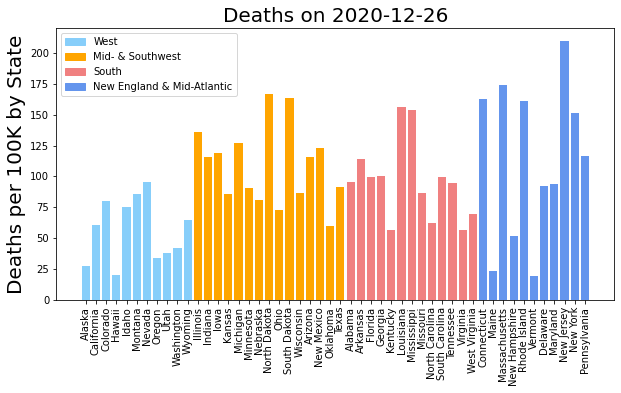

In [21]:
#Test plot for ONE date - Deaths

#use inline for static plots as opposed to dynamic plots
%matplotlib inline    
frameno = df2ts.shape[1]-1          #row 50 will be called, selected randomly
column=df2ts.iloc[:,frameno].name         #gets the name of the column which is the date
#df2tss=df2ts.sort_values(by=[column])     #sorts from least to most cases
df2tss=df2ts #.sort_values(by=[column])     
date=str(df2ts.iloc[:,frameno].name).split()[0:10][0]

#Plotting
fig, axs = plt.subplots(figsize=(10,5))
axs.bar(df2tss.index, df2tss.iloc[:,frameno], color=df2ts.index.map(colors))   #bar graph
plt.xticks(rotation=90)
axs.set_title("Deaths on "+date, fontsize=20)
axs.set_ylabel('Deaths per 100K by State', fontsize=20)

labels = list(colors_region.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors_region[label]) for label in labels]
axs.legend(handles, labels)#, loc = 'upper left', shadow=False, fontsize=20)

plt.show()

<IPython.core.display.Javascript object>


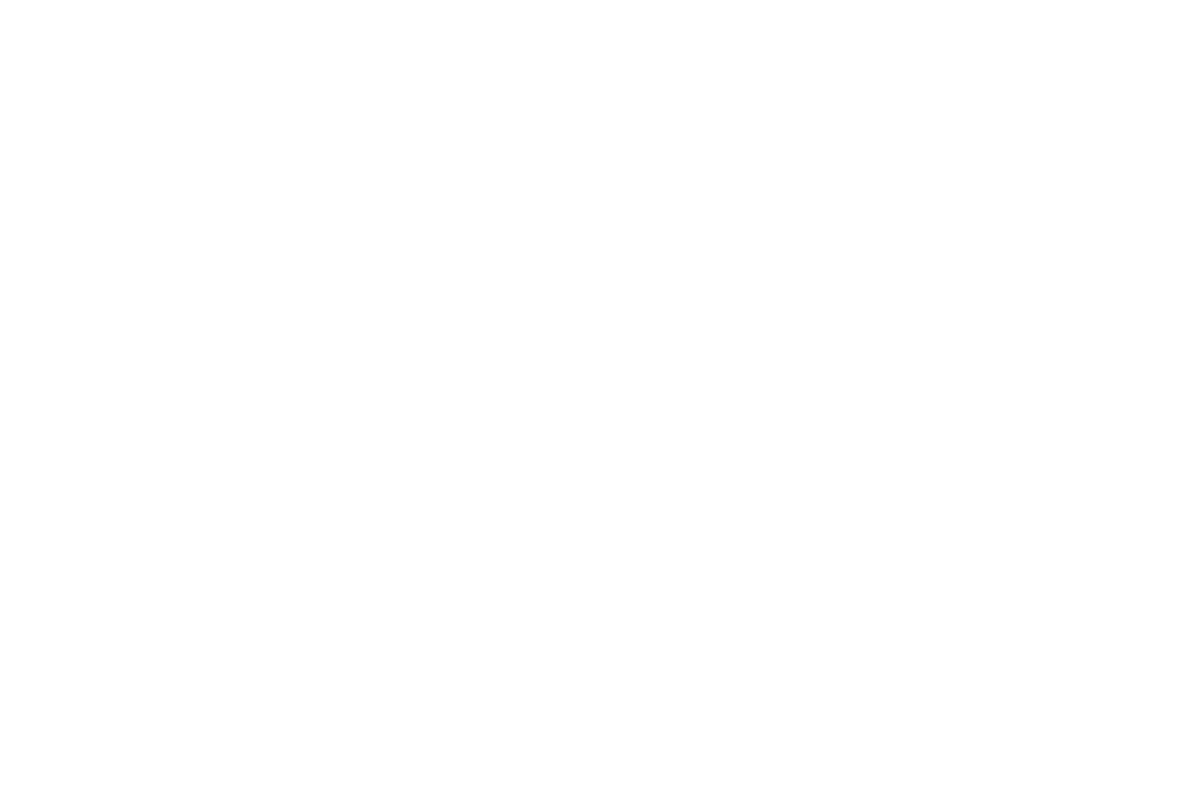

<IPython.core.display.Javascript object>


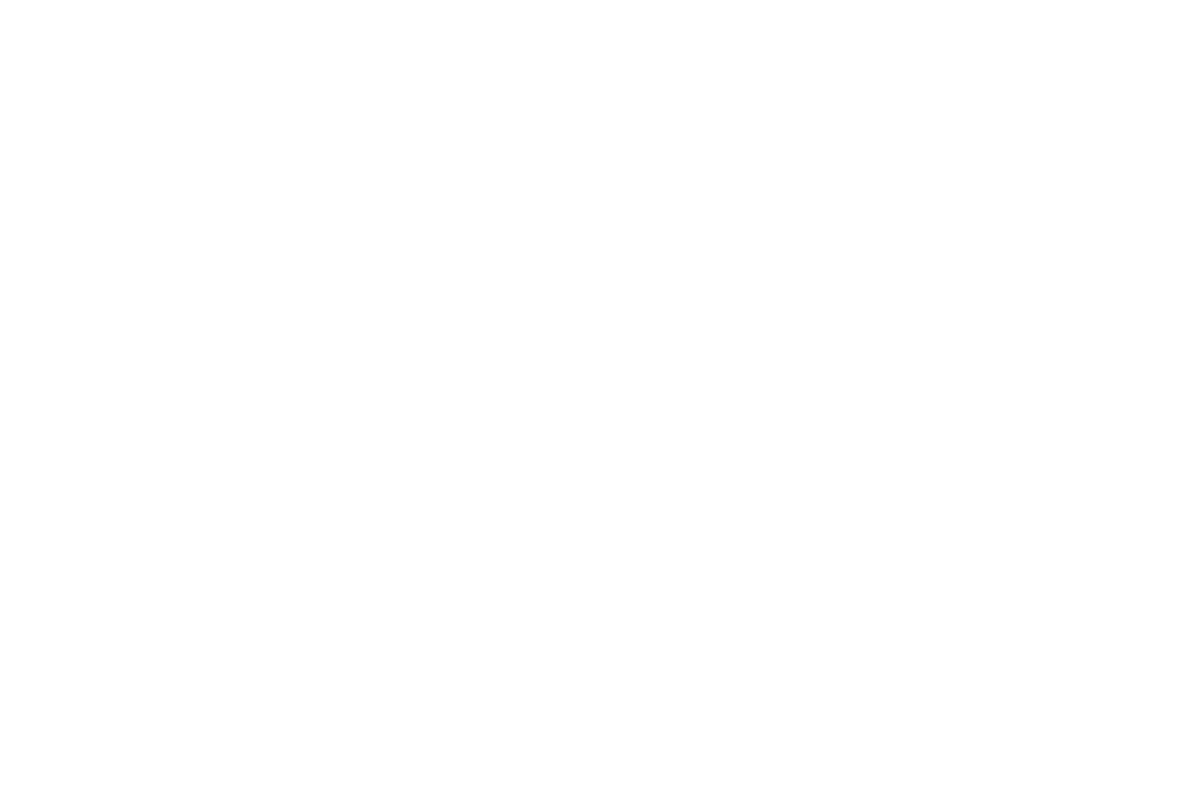

Traceback (most recent call last):
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [22]:
#Animation Plot of cases over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_ylabel('Cases per 100K by State', fontsize=20)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df1ts.iloc[:,frameno].name).split()[0]
    labels = list(colors_region.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors_region[label]) for label in labels]
    axs.legend(handles, labels, loc = 'upper right', shadow=False, fontsize=10)
    date=str(df1ts.iloc[:,frameno].name).split()[0:10][0]
    axs.set_title("Cases per 100K on "+date, fontsize=20)

    return axs.bar(df1ts.index, df1ts.iloc[:,frameno], color=df1ts.index.map(colors))

f=df1ts.shape[1]-1  #for full plot
# f=20   #for 20 columns of data, for error checking

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=f , interval=50, blit=False)

anim.save('miscellaneous\\plots\\CaseOverTime_percap.gif', writer='pillow')    #saves the animation to a .gif file
#Update 10.20.2020, writer='ffmpeg' does not work, switched to 'pillow'

plt.show()    #looks better when you save the animation

<IPython.core.display.Javascript object>


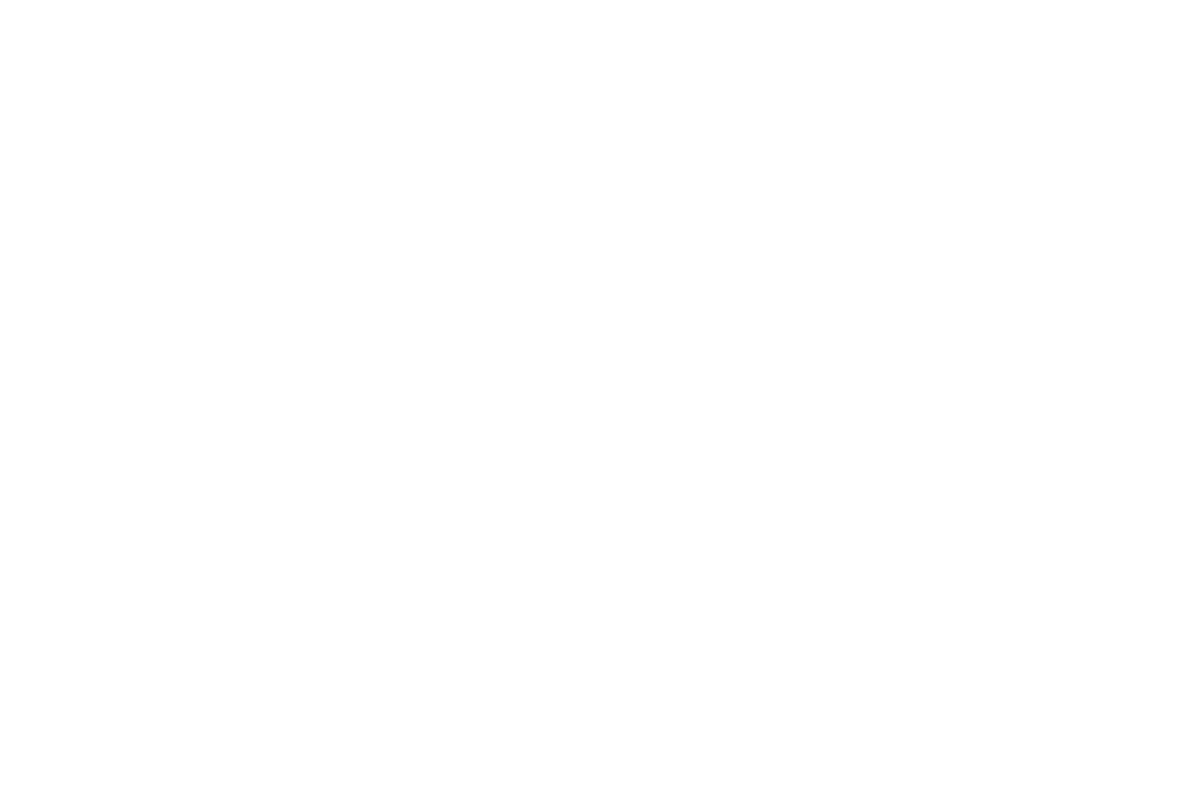

<IPython.core.display.Javascript object>


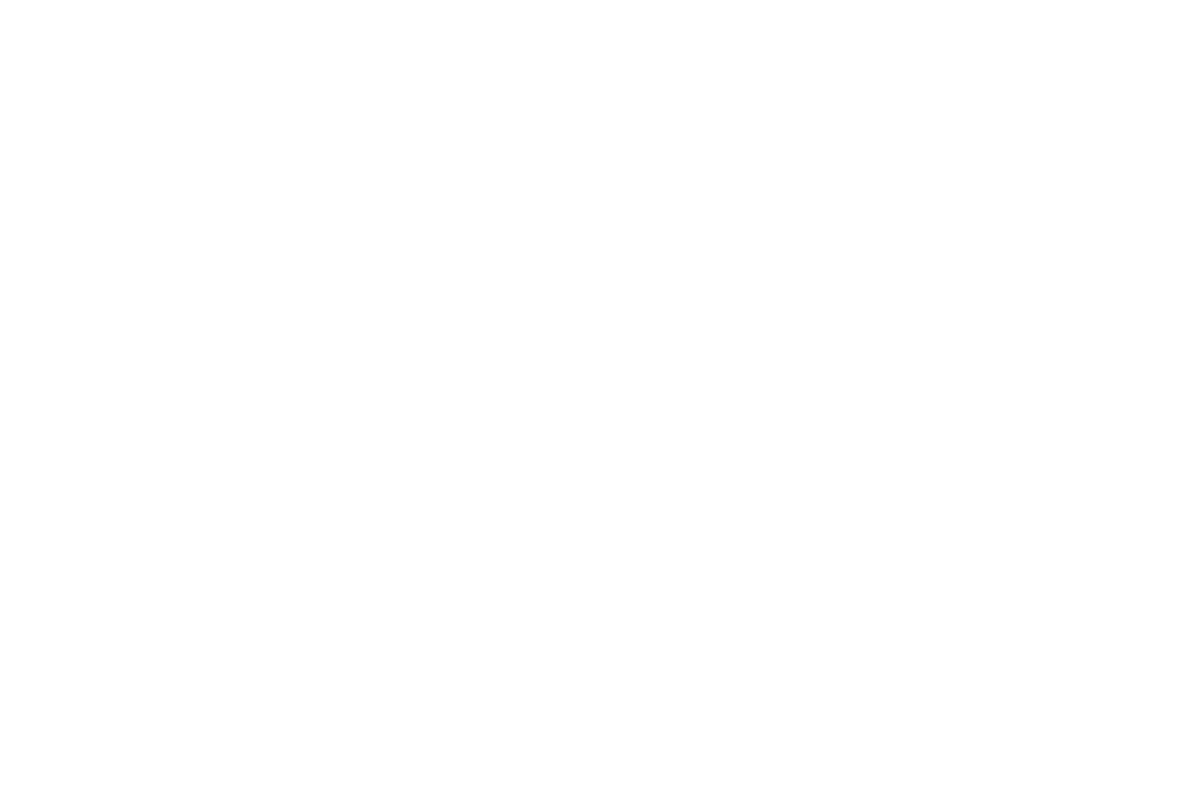

Traceback (most recent call last):
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\johnl\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [23]:
#Animation Plot of deaths over time

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#use notebook for dynamic plots as opposed to static plots
%matplotlib notebook

#Initial plot set-up
fig, axs = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90, fontsize=10)
axs.set_ylabel('Deaths per 100K by State', fontsize=20)
axs.set_xlabel('State', fontsize=10)

#Did not use init function but can be used to set initial background of plot per frame
def init():
    return

#Create function for EACH frame, input to FuncAnimation method
def animate(frameno):
    column=str(df2ts.iloc[:,frameno].name).split()[0]
    labels = list(colors_region.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors_region[label]) for label in labels]
    date=str(df2ts.iloc[:,frameno].name).split()[0:10][0]
    axs.set_title("Deaths per 100K on "+date, fontsize=20)
    axs.legend(handles, labels, loc = 'upper right', shadow=False, fontsize=10)
    return axs.bar(df2ts.index, df2ts.iloc[:,frameno], color=df2ts.index.map(colors))

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=df2ts.shape[1]-1 , interval=50, blit=False)
#deaths start end of february

anim.save('miscellaneous\\plots\\DeathOverTime_percap.gif', writer='pillow')    #saves the animation to a .gif file

plt.show()    #looks better when you save the animation

# 3. Cases/deaths on US Map for different dates


In [24]:
#Read pickles created before, use for animation plot
df1 = pd.read_pickle('Data_pkl\\cases_by_state.pkl')
df2 = pd.read_pickle('Data_pkl\\deaths_by_state.pkl')
df1.head()
#df2.head()

,date,Washington,Massachusetts,Florida,New Jersey,Nebraska,Virginia,Indiana,Michigan,Rhode Island,...,Mississippi,Utah,South Dakota,North Dakota,Oklahoma,Guam,American Samoa,Northern Mariana Islands,Virgin Islands,Puerto Rico
0,2020-01-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Prep cases/deaths dataframe for USA Map Plot
df1.index = df1.date              #set date as index
df1 = df1.drop(['date'], axis=1)  #drop extra date column that is not the index
#df1.head()

df2.index = df2.date              #set date as index
df2 = df2.drop(['date'], axis=1)  #drop extra date column that is not the index
#df2.head()

#Transpose data to plot rows separately
df1t = df1.T
df2t = df2.T
#dft1.head()
#dft2.head()

#Sort data by date
df1ts=df1t.sort_index()
df2ts=df2t.sort_index()
#df1ts.head()
#df2ts.head()

In [26]:
df1ts.head()

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26
Alabama,0,0,0,0,0,0,0,0,0,0,...,310335,315683,319904,322452,324832,329811,334569,338801,342426,343458
Alaska,0,0,0,0,0,0,0,0,0,0,...,41418,41905,42235,42413,42563,43001,43361,43629,43629,43990
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,435036,442671,448231,453597,461345,467215,473273,480319,486935,493041
Arkansas,0,0,0,0,0,0,0,0,0,0,...,194543,197421,200114,201650,203107,205048,207941,211145,213267,213969


In [27]:
#import modules for map
import geopandas as gpd
import shapefile as shp

# read in .shp file for US map
usa_map = gpd.read_file('.\miscellaneous\states_21basic\states.shp')
usa_map = usa_map.sort_values(by="STATE_NAME")
usa_map.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
42,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
36,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [28]:
# merge map and Covid dataframes (c=cases, d=deaths)
covid_mapc = pd.merge(usa_map,df1ts, how='left', left_on=['STATE_NAME'], right_on=df1ts.index)   #creates geopandas df
covid_mapc = covid_mapc.dropna()
covid_mapd = pd.merge(usa_map,df2ts, how='left', left_on=['STATE_NAME'], right_on=df2ts.index)   #creates geopandas df
covid_mapd = covid_mapd.dropna()

# remove Alaska and Hawaii
covid_mapc = covid_mapc [covid_mapc.STATE_ABBR != 'HI']
covid_mapc = covid_mapc [covid_mapc.STATE_ABBR != 'AK']
covid_mapd = covid_mapd [covid_mapd.STATE_ABBR != 'HI']
covid_mapd = covid_mapd [covid_mapd.STATE_ABBR != 'AK']

covid_mapc.head(2)
#covid_mapd.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,...,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-19 00:00:00,2020-12-20 00:00:00,2020-12-21 00:00:00,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-25 00:00:00,2020-12-26 00:00:00
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,310335,315683,319904,322452,324832,329811,334569,338801,342426,343458
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,435036,442671,448231,453597,461345,467215,473273,480319,486935,493041


In [29]:
covid_mapc.shape[1]

355

In [30]:
#convert long column date names back to shorter strings
column_names = []    #creating new list of column names to replace old column names
misc = ['STATE_NAME','DRAWSEQ','STATE_FIPS',
        'SUB_REGION','STATE_ABBR','geometry']
for each in misc:
    column_names.append(each)
for each in covid_mapc.columns[6:]:
    each = str(each).split()[0]
    column_names.append(each)
covid_mapc.columns = column_names    #replace old column names with new ones for cases
covid_mapd.columns = column_names    #replace old column names with new ones for deaths
covid_mapc.head(2)

#convert cases to log scale to understand USA map better
for i in range(0,49):
    for j in range(7,covid_mapc.shape[1]):
        if covid_mapc.iloc[i,j] != 0:
            covid_mapc.iloc[i,j] = np.log(covid_mapc.iloc[i,j])
covid_mapc.head(2)

#convert deaths to log scale to understand USA map better
for i in range(0,49):
    for j in range(7,covid_mapd.shape[1]):
        if covid_mapd.iloc[i,j] != 0:
            covid_mapd.iloc[i,j] = np.log(covid_mapd.iloc[i,j])
covid_mapd.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26
0,Alabama,43,01,East South Central,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0,0,0,0,...,8.355615,8.365440,8.386857,8.386857,8.386857,8.401109,8.430981,8.450198,8.451053,8.452121
2,Arizona,37,04,Mountain,AZ,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",0,0,0,0,...,8.945984,8.964312,8.979291,8.983565,8.983691,9.002701,9.009325,9.023288,9.037058,9.038840


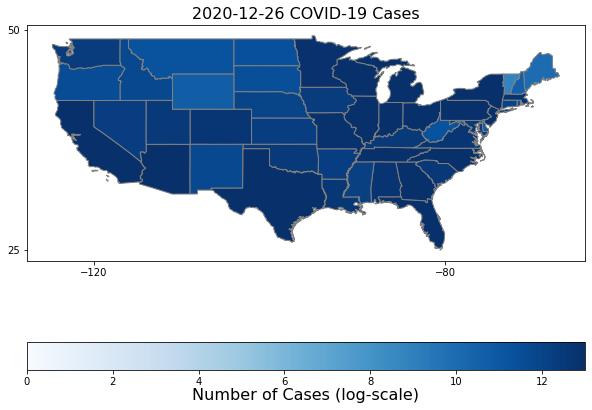

In [31]:
#single plot of most recent data
%matplotlib inline

latest_date=str(df1ts.iloc[:,df1ts.shape[1]-1 ].name).split()[0:10][0]
#latest_date = '2020-05-01'
fig,ax=plt.subplots(figsize=(10,10))
ax = covid_mapc.plot(column=latest_date,
             cmap='Blues',
             ax=ax,
             #alpha=0.5,
             edgecolor='grey',                
             legend=True,
             legend_kwds={'orientation':'horizontal'},
             vmin=0, vmax=13)       
ax.set_title(latest_date+' COVID-19 Cases', fontsize=16)
ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
ax.xaxis.set_major_locator(plt.MaxNLocator(1))
ax.yaxis.set_major_locator(plt.MaxNLocator(1))

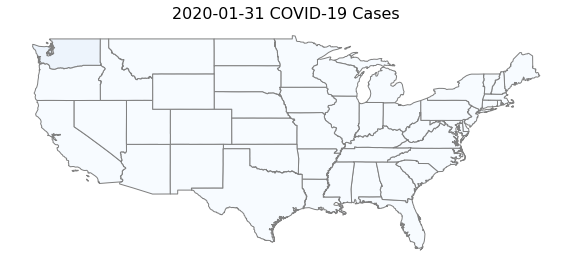

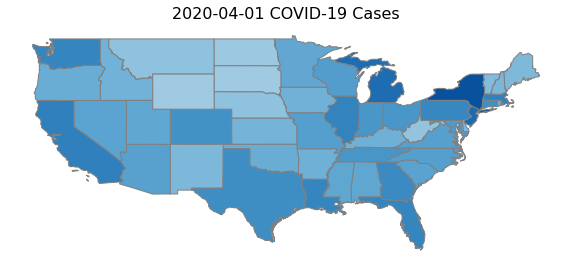

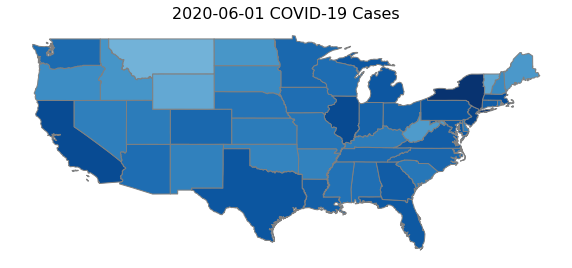

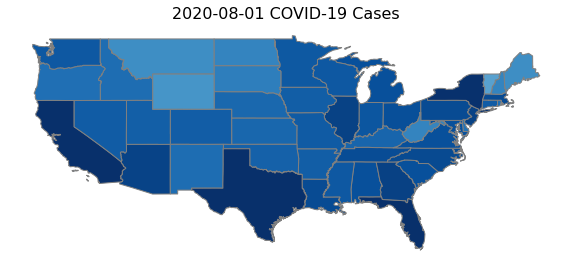

In [32]:
# create choropleth map for Covid-19 cases
dates=['2020-01-31', '2020-04-01','2020-06-01','2020-08-01']   #dates we want to plot

# create choropleth map for Covid-19 cases
%matplotlib inline

for each in dates:
    fig,ax=plt.subplots(figsize=(10,10))
    ax = covid_mapc.plot(column=each,
                 cmap='Blues',
                 ax=ax,
                 #alpha=0.5,
                 edgecolor='grey',                
                 #legend=False,
                 #legend_kwds={'orientation':'horizontal'},
                 vmin=0, vmax=13)       
    ax.set_title(each+' COVID-19 Cases', fontsize=16)
    ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
    ax.xaxis.set_major_locator(plt.MaxNLocator(1))
    ax.yaxis.set_major_locator(plt.MaxNLocator(1))

    #ax.set_legendscale("log")
    #ax.legend(frameon=False)
    #leg = ax.get_legend()
    #leg.set_bbox_to_anchor((0., 0., 1, 1))
    ax.set_axis_off()

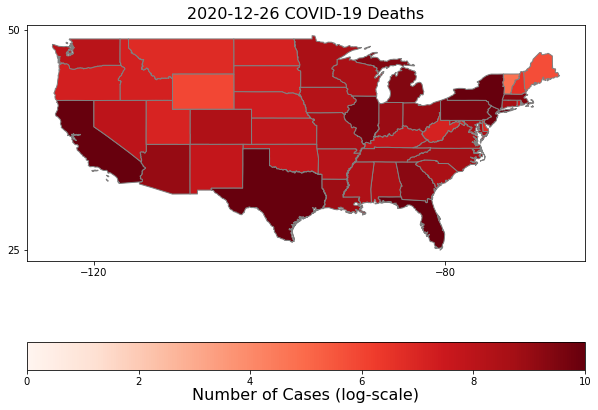

In [33]:
#single plot of most recent data
%matplotlib inline

latest_date=str(df2ts.iloc[:,df2ts.shape[1]-1 ].name).split()[0:10][0]
#latest_date = '2020-04-25'
fig,ax=plt.subplots(figsize=(10,10))
ax = covid_mapd.plot(column=latest_date,
             cmap='Reds',
             ax=ax,
             #alpha=0.5,
             edgecolor='grey',                
             legend=True,
             legend_kwds={'orientation':'horizontal'},
             vmin=0, vmax=10)       
ax.set_title(latest_date+' COVID-19 Deaths', fontsize=16)
ax.set_xlabel("Number of Cases (log-scale)",fontsize=16,  labelpad=110)
ax.xaxis.set_major_locator(plt.MaxNLocator(1))
ax.yaxis.set_major_locator(plt.MaxNLocator(1))

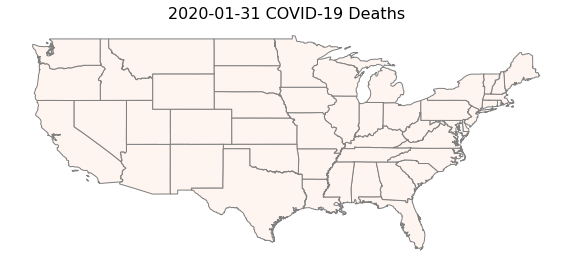

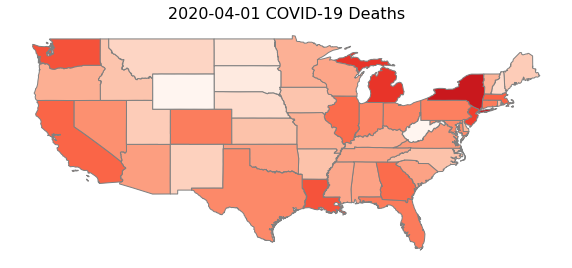

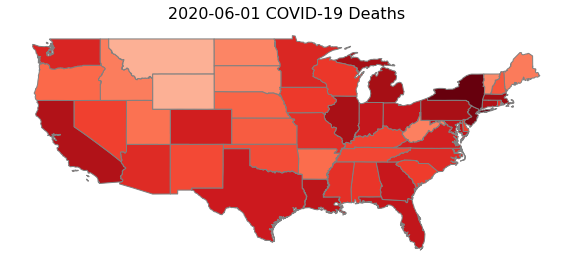

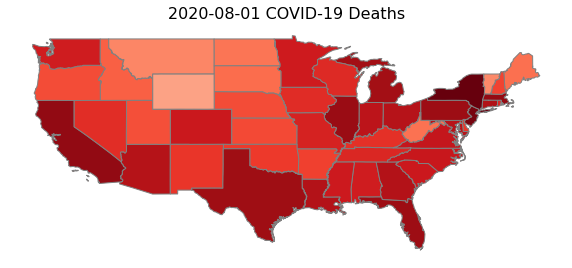

In [34]:
# create choropleth map for Covid-19 deaths
dates=['2020-01-31', '2020-04-01','2020-06-01','2020-08-01']   #dates we want to plot

# create choropleth map for Covid-19 deaths
%matplotlib inline

for each in dates:
    fig,ax=plt.subplots(figsize=(10,10))
    ax = covid_mapd.plot(column=each,
                 cmap='Reds',
                 ax=ax,
                 #alpha=0.5,
                 edgecolor='grey',                
                 #legend=True,
                 #legend_kwds={'orientation':'horizontal'},
                 vmin=0, vmax=10)       
    ax.set_title(each+' COVID-19 Deaths', fontsize=16)
    ax.set_xlabel("Number of Deaths (log-scale)",fontsize=16,  labelpad=110)
    ax.xaxis.set_major_locator(plt.MaxNLocator(1))
    ax.yaxis.set_major_locator(plt.MaxNLocator(1))

    #ax.set_legendscale("log")
    #ax.legend(frameon=False)
    #leg = ax.get_legend()
    #leg.set_bbox_to_anchor((0., 0., 1, 1))
    ax.set_axis_off()

# 4. Population versus cases plots

In [35]:
#Importing cleaned COVID data
covid = pd.read_pickle('Data_pkl\\covidtrackingproject_kaggleformat_df.pkl') 
pop_by_state = pd.read_csv("Data_Raw\\State_Populations.csv")#, index_col=['date'])

#covid.dtypes
covid.head()
#pop_by_state.head()

,date,state,fips,cases,deaths
0,2020-01-13,Washington,53,0,0
1,2020-01-14,Washington,53,0,0
2,2020-01-15,Washington,53,0,0
3,2020-01-16,Washington,53,0,0
4,2020-01-17,Washington,53,0,0


In [36]:
pop_by_state

,state,population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989
5,Illinois,12768320
6,Ohio,11694664
7,Georgia,10545138
8,North Carolina,10390149
9,Michigan,9991177


In [37]:
pop_by_state.head()

,state,population
0,California,39776830
1,Texas,28704330
2,Florida,21312211
3,New York,19862512
4,Pennsylvania,12823989


In [38]:
latest = max(covid.date.unique())
latest_date = latest.astype(str).split()[0][0:10]
latest_covid = covid[covid.date==latest]
latest_covid.head()

,date,state,fips,cases,deaths
16707,2020-12-26,Kansas,20,209689,2507
16708,2020-12-26,Idaho,16,135233,1349
16709,2020-12-26,Illinois,17,934142,17224
16710,2020-12-26,Indiana,18,492021,7801
16711,2020-12-26,Kentucky,21,255563,2534


In [39]:
latest_covid_pop = pd.merge(latest_covid,pop_by_state, how='left', left_on=['state'], right_on=['state'])
latest_covid_pop.head()

,date,state,fips,cases,deaths,population
0,2020-12-26,Kansas,20,209689,2507,2918515.0
1,2020-12-26,Idaho,16,135233,1349,1753860.0
2,2020-12-26,Illinois,17,934142,17224,12768320.0
3,2020-12-26,Indiana,18,492021,7801,6699629.0
4,2020-12-26,Kentucky,21,255563,2534,4472265.0


Text(0.5, 0, 'Population')

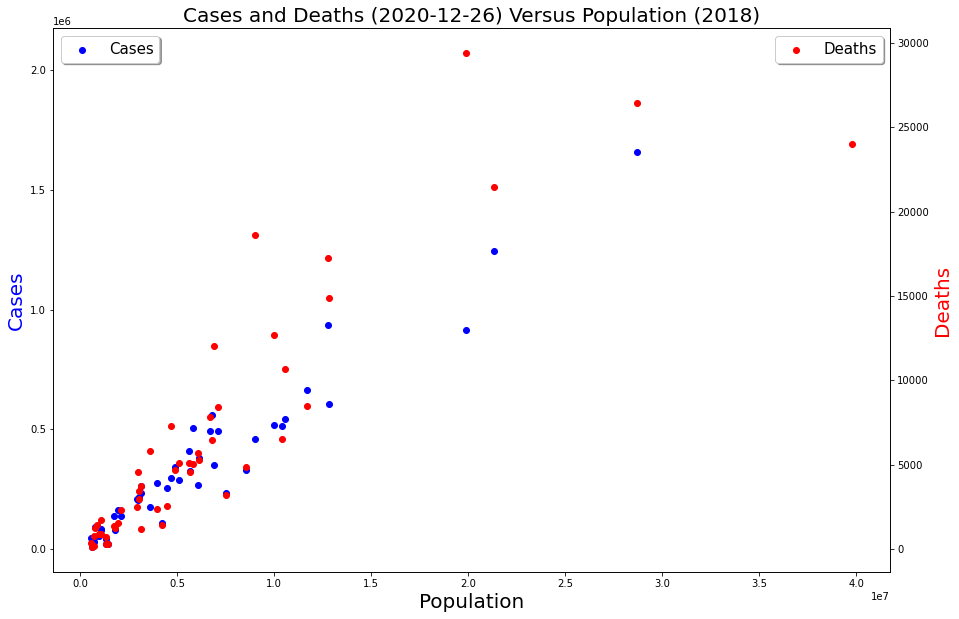

In [40]:
# Population vs Cases Scatterplots
%matplotlib inline

fig, axs = plt.subplots(figsize=(15,10))

#scatterplots
axs.scatter(latest_covid_pop.population, latest_covid_pop.cases, color='b')
axs2 = axs.twinx()
axs2.scatter(latest_covid_pop.population, latest_covid_pop.deaths, color='r')
axs.legend(['Cases'], loc = 'upper left', shadow=True, fontsize=15)
axs2.legend(['Deaths'], shadow=True, fontsize=15)

#Labeling
axs.set_title("Cases and Deaths ("+ latest_date + ") Versus Population (2018)", fontsize=20)
axs.set_ylabel('Cases', fontsize=20, color = 'b')
axs2.set_ylabel('Deaths', fontsize=20, color = 'r')
axs.set_xlabel('Population', fontsize=20)
#axs.xaxis.set_major_locator(plt.MaxNLocator(5))
